### Stochastic Gradient MCMC

- Let’s think of each particle $i$ having a velocity $p_i$ and a position $q_i$ as being similar to each element $w_i$. In the same way that the particles settle into an energetic minimum, the weights will settle into a configuration that minimizes a loss function. So, here we have our first bridge between thermodynamics and machine learning:</p>
<p><em>Energy in a given configuration (<strong>p</strong>, <strong>q</strong>) = Loss Function (<strong>w</strong>)</em></p>

- To get back to our water analogy, imagine this time that you have a bottle of water sitting on your table. Now, shake the bottle and put it back down. The process taking place between the moment that the water bottle is put down and the moment that the water settles again into its equilibrium state is called **relaxation**. It turns out that a major concept to quantify relaxation from a non-equilibrium state is the KL-Divergence between the equilibrium distribution and the non-equilibrium distribution.
- Getting back to our ML algorithm, the transformation from our initial, randomly distributed weights to our final, minimum loss weights, is the exact mirror of this thermodynamic relaxation from an initial non-equilibrium state. This gives us our second analogy between machine learning and statistical physics:
<p><em>Relaxation from an initial non-equilibrium state = Optimizing weights to learn from examples</em></p>

- We made the fundamental point that a physical system relaxing to equilibrium by minimizing its energy was analogous to a machine learning model minimizing its loss. 

- There is a fundamental difference between your neural network after training and the molecules sitting at the bottom of the bottle: the water appears still, but the individual water molecules are constantly moving around; by contrast, the neural network’s weights are fixed.

- Another way of saying this is that the water molecule’s positions are characterized by *probability distributions*. We need to change the outcome of our algorithms so that instead of a point estimate, we also get probability distributions for the parameters. Beyond making our neural network look more like a physical system, there are many advantages to doing that:
 - To quantify uncertainty
 - Regularizaiton

#### The probability distributions minimizing energy. 

\begin{eqnarray}
p(\mathbf{w})  \propto  e^{-\beta E(w)}  
\end{eqnarray}

- In physics, this is called the *Boltzmann distribution*. The probability of a given weight configuration is inversely proportional to the exponential of the energy $E$ of that configuration multiplied by a constant $\beta$. The proof is relatively straightforward, especially in the case of a system with fixed total energy
- lower probabilities for configurations with higher energies.

- What about the ‘spread’ of this distribution? It will depend on $\beta$: for very high values of $\beta$, even small deviations of the energy from its minimum will cause the probabilities to drop massively. It turns out that $\beta=1/T$, where $T$ is the temperature, which matches what we had said earlier: the higher the temperature, the more ‘spread out’ the distribution will be.
- $\beta$가 클 수록 (T가 낮을 수록) stable.
- This is where one of the major gaps in the statistical mechanics and machine learning bridges occurs. As much as the Boltzmann distribution is rigorously justified in many settings in statistical mechanics, *the adoption of this probability distribution in Bayesian ML is an assumption*. Let’s see why, and try to find out what that assumption entails.

#### Making NN probablistic 

- Let’s put everything together: we’ve seen that energy functions and loss functions are analogous. We’ve shown what probability distribution is implied by a given energy function in statistical mechanics. Let’s now specify our loss, or energy function to be the mean squared error:
\begin{eqnarray}
E(\mathbf{w}) = \frac{1}{n}\sum_i \left( f \left( \mathbf{x_i}; \mathbf{w} \right) - y_i \right)^2
\end{eqnarray}

- The probability distribution of our weights instantly becomes:
\begin{eqnarray}
p(\mathbf{w}) \propto \exp{\left[ -\beta\frac{1}{n}\sum_i \left( f \left( \mathbf{x_i}; \mathbf{w} \right) - y_i \right)^2\right]}
\end{eqnarray}

- Boltzmann distribution을 따른다고 가정하면 Energy (loss) function으로 weight distribution 바로 구할 수 있음. 위 식처럼 loss를 MSE로 가정하면 Boltzmann distribution은 Gaussian이 됨.

- Does it mean computing this probability distribution is trivial? Not really. Consider getting a new example $x_j$. What is our network’s prediction? It wouldn’t make sense to use one set of weights; what we really want is the expectation of the prediction under our probability distribution:
\begin{eqnarray}
\hat{y} = \int p(\mathbf{w}) f(\mathbf{x_j}; \mathbf{w}) d\mathbf{w}
\end{eqnarray}

#### Evaluating intractable integrals 

- First try: Traditional Monte Carlo methods.
    - n개의 weight를 sample한 후, evaluate p(w) at these points, and we're done.

- Second Try: Markov Chain Monte Carlo
    - We start out in a random position $x$ on the map. Then we pick a nearby candidate next position $y$. To judge if $y$ is an acceptable candidate, we compute $\alpha = p(y)/p(x)$. $\alpha$가 1 이상이면 go, 1보다 작으면 그 계산된 확률 기반 결정.
    - 이런 기본적인 Metropolis-Hastings algorithm은 하나의 mode에서 나오는데 오래 걸려서 multi-modality 환경에서는 exploration is too  slow.
    
- Third Try: Hamiltonian Monte Carlo
    - So, how does HMC work? Remember we made the analogy between each individual weight and the position and velocity of individual water molecules? This is a little different. We’re imagining a system where the weights only represent the <em>positions</em> of the molecules, and the loss function is still our MSE. What we’re adding on top of that is that the molecules have <em>momenta</em> $p$. Then, we can define our new total energy function, or *Hamiltonian*, as the sum of the MSE and kinetic energy $1/2\vert p \vert^2$. The <em>joint</em> distribution for $w$ and $p$ becomes:

\begin{eqnarray}
p(\mathbf{w}, \mathbf{p}) \propto \exp{\left[ -\beta\frac{1}{n}\sum_i \left( f \left( \mathbf{x_i}; \mathbf{w} \right) - y_i \right)^2 + \frac{1}{2}\vert \mathbf{p}\vert^2\right]}
\end{eqnarray}
- $w$에 의해 위치에너지만 minimize 되고, p라는 momentum 독립변수가 존재하고 두 에너지를 합한 새로운 total energy, Hamiltonian을 define 함. $p(w,p)$가 Boltzmann distribution을 따르게 됨. 
- The plan is then to sample from this distribution, then to simply ignore the values for the momenta; they’re only here to help us sample this high dimensional space efficiently. 

#### Need for Stochastic Gradient MCMC

- We can definitely train neural networks using HMC. The issue is that, if you’re thinking about modern datasets and architectures, with millions of weights, and millions of examples, HMC is still not going to cut it. No mini-batches - No backprop - No SGD.

- We need something that can deal with modern architectures and datasets. We’ll talk about one of the possible proposed ways to circumvent these limitations. It turns out it’ll also help us continue exploring the relationship between statistical mechanics and machine learning: Bayesian Learning via Stochastic Gradient Langevin Dynamics(SGLD).

- Unfortunately, each iteration of a MC algorithm requires going through the entire dataset - which seems completely impossible for more modern datasets.

#### SGLD (Stochastic Gradient Langevin Dynamics)

- Langevin Dynamics, a common approach in the modeling of molecular systems. Langevin Dynamics surfaced in ML in 2011, when Welling and Teh published Bayesian Learning via Stochastic Gradient Langevin Dynamics. This approach was one of the alternatives proposed to make neural networks probabilistic while remaining tractable for big datasets.

- Sometime in 1827, a botanist, Robert Brown, was looking at pollen grains in water, and saw them moving around randomly. A couple of years later, a young scientist, Albert Einstein, wrote a detailed paper explaining how the pollen’s motion was caused by the random impacts of the water molecules on the pollen grain. This random walk was named Brownian motion, after the botanist. 

- We want to write Newton’s law $\Sigma F = ma$ for the pollen grain, and we already know that one of the forces is this random force coming from the water molecules. *We’ll make the hypothesis that this random force, $\epsilon_t$, is normally distributed.* In macroscale physics, we usually neglect friction - but in our case, the entire hypothesis rests on the idea that the pollen grain is crowded; we need to include friction. If the grain has a velocity in a given direction, there will be way more water molecule impacts towards the front of the molecule: the friction force will tend to slow the pollen grain down. Therefore, we can write the friction force as proportional to the opposite of our molecule’s velocity $-\gamma\mathbf{v}$. The $\gamma$ is the friction coefficent. So, here’s our first shot, including a generic $F$ for any external forces:</p>

- *Underdamped Langevin Equation*:
\begin{eqnarray}
m\mathbf{a}_t = -\gamma \mathbf{v}_t + \epsilon_t + \mathbf{F}
\end{eqnarray}


- Let’s make this even simpler. The pollen grain in water is really very light, and the friction and random forces are going to be significantly higher than the acceleration times mass term; we often say the dynamics are ‘overdamped'. 
- *Overdamped Langevin Equation*:
\begin{eqnarray}
0 = -\gamma \mathbf{v}_t + \epsilon_t + \mathbf{F}
\end{eqnarray}

- First, we’ll discretize the velocity term. Second, a force is simply the derivative of the energy. 
\begin{eqnarray}
\mathbf{x}_{t+\Delta t} = \mathbf{x}_{t} + \frac{\Delta t}{\gamma} \mathbf{\epsilon}_t + \frac{\Delta t}{\gamma} \nabla E 
\end{eqnarray}
    - This is a gradient descent update with an added random term

##### Vanilla SGD
\begin{eqnarray}
\mathbf{x}_{t+\Delta t} = \mathbf{x}_{t} + \lambda_t \nabla E_{MB(t)} 
\end{eqnarray}

- Let’s further make the approximation that the real gradient, $\nabla E$, is the same as the gradient over the entire dataset. 

\begin{eqnarray}
\nabla E_{MB(t)} = \nabla E + \eta_t
\end{eqnarray}

- $\eta_t$ is the error because of the mini-batch. 
- As we decrease the learning rate, $\lambda_t$ to zero, the error term, $\eta_t$ will be squashed to 0 as well and our weights will settle in a configuration that minimizes our loss function. $\mathbb{O}(\lambda^2)$

\begin{eqnarray}
\mathbb{E}[\nabla E_{MB(t)}]  & = & \nabla E  \\
\mathbb{E}[\eta_t] & = & 0 \\
\mathbb{V}[\lambda_t \eta_t] &\propto& \lambda_t^2 \\
\end{eqnarray}



#### SGLD
- We now have everything we need to understand what Welling and Teh did in their paper: they took the traditional SGD updates and added langevin noise.
\begin{eqnarray}
\mathbf{x}_{t+\Delta t} = \mathbf{x}_{t} + \lambda_t \nabla E_{MB(t)} +  \epsilon_t
\end{eqnarray}

- 해석해보면, 어떤 external force (loss function의 surface)에 의해 일정 방향으로 끌려 가기는 하는데 random noise ($\epsilon_t$에 의해 흔들리는 것. Brownian motion) 
- exteranl force가 이끄는 true direction으로 가려면 $\nabla E$ 전체 데이터셋을 봐야 하지만, Minibatch를 사용하고 그 때 발생하는 error term, $\eta_t$는 learning rate를 0으로 보내줌으로써 없어지도록 한다.
- Langevin error term, $\epsilon_t$의 variance는 얼마로?
    -  Remember that what we want is for our weights to converge to samples of their posterior distribution by adding noise at each step - so we want our noise to dominate the minibatch noise.
    - The way the authors went about doing this is by choosing $\sigma_t^2 = \lambda_t$; if we do this, the injected noise will dominate the minibatch noise at the end of the training process!

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

from torch.distributions import Normal
import copy

from torch.distributions import Categorical

In [2]:
train_dataset= torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset= torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [3]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
class SGLD(nn.Module):
    def __init__(self): 
        super().__init__()
        self.linear1 = nn.Linear(784,256)
        self.linear2 = nn.Linear(256,256)
        self.linear3 = nn.Linear(256,10)
        self.relu = nn.ReLU()
                     
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = SGLD().to(device)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
gamma=0.998

In [8]:
def SGLD_update(model, lr, gamma, add_noise):
    langevin_noise  = Normal(0, np.sqrt(lr))
    for param in model.parameters():        
        if add_noise:
            param.data += -lr*param.grad.data + langevin_noise.sample()
        else:
            param.data += -lr*param.grad.data
    lr *= gamma
    return model, lr

In [9]:
learning_rate = 0.1
num_epoch = 8
sampled_models=[]
model.train()
for epoch in range(num_epoch):
    for idx, (img, label) in enumerate(train_loader):
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        pred = model(img)
        loss = criterion(pred, label)
        loss.backward()
        if epoch < 4:
            langevin_dynamics_phase = False
        else:
            langevin_dynamics_phase = True
        model, learning_rate = SGLD_update(model, learning_rate, gamma, add_noise=langevin_dynamics_phase)        
        
        if idx%400==0:
            print(f'epoch:{epoch}, iter:{idx}, loss:{loss.item():.4f}, learning_rate:{learning_rate:.15f}')
            if langevin_dynamics_phase and len(sampled_models)<20:
                sampled_models.append(copy.deepcopy(model.state_dict()))            

epoch:0, iter:0, loss:2.3034, learning_rate:0.099800000000000
epoch:0, iter:400, loss:0.7094, learning_rate:0.044807122674251
epoch:0, iter:800, loss:0.2345, learning_rate:0.020117016456367
epoch:0, iter:1200, loss:0.2628, learning_rate:0.009031920082168
epoch:0, iter:1600, loss:0.1403, learning_rate:0.004055053618294
epoch:1, iter:0, loss:0.1581, learning_rate:0.002338274293311
epoch:1, iter:400, loss:0.3762, learning_rate:0.001049813057179
epoch:1, iter:800, loss:0.1425, learning_rate:0.000471333691764
epoch:1, iter:1200, loss:0.3999, learning_rate:0.000211614294062
epoch:1, iter:1600, loss:0.2570, learning_rate:0.000095008292922
epoch:2, iter:0, loss:0.2747, learning_rate:0.000054784836380
epoch:2, iter:400, loss:0.1801, learning_rate:0.000024596702248
epoch:2, iter:800, loss:0.2232, learning_rate:0.000011043160872
epoch:2, iter:1200, loss:0.5507, learning_rate:0.000004958038716
epoch:2, iter:1600, loss:0.1962, learning_rate:0.000002226006503
epoch:3, iter:0, loss:0.4032, learning_r

In [10]:
with torch.no_grad():
    model.eval()
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on test dataset: {100 * correct / total}%')

Accuracy on test dataset: 91.74%


In [11]:
def sgld_predict(sampled_models, x, total_probs, total_entropy, model_entropy):
    yhat_arr = []
    entropy_model_arr= []
    
    model = SGLD().to(device)
    
    for state_dict in sampled_models:     
        model.load_state_dict(state_dict)
        yhat = torch.softmax(model(x), dim=1)
        yhat_arr.append(yhat)
        
        entropy_model = Categorical(probs=yhat).entropy()
        entropy_model_arr.append(entropy_model.cpu().detach())
        
    yhat_arr  = torch.stack(yhat_arr, -1)
    probs = torch.mean(yhat_arr, axis=-1)    

    entropy = Categorical(probs=probs).entropy()
    total_probs = torch.cat((total_probs, probs.cpu().detach()), dim=0)
    total_entropy = torch.cat((total_entropy, entropy.cpu().detach()), dim=0)
    
    entropy_model_arr  = torch.stack(entropy_model_arr, -1)
    model_entropy = torch.cat((model_entropy, torch.mean(entropy_model_arr, dim=-1)))
    
    return total_probs, total_entropy, model_entropy

In [12]:
total_probs = torch.zeros(0)
total_entropy = torch.zeros(0)
total_label = torch.zeros(0)
model_entropy = torch.zeros(0)

for idx, (images, labels) in enumerate(test_loader):
    images = images.to(device)
    total_probs, total_entropy, model_entropy = sgld_predict(sampled_models, images, total_probs, total_entropy, model_entropy)
    total_label = torch.cat((total_label, labels.float()), dim=0)

In [13]:
total_entropy[:10]

tensor([0.0374, 0.1611, 0.1665, 0.0137, 0.3696, 0.1239, 0.1823, 0.4441, 0.1263,
        0.1833])

In [14]:
model_entropy[:10]

tensor([0.0373, 0.1602, 0.1663, 0.0136, 0.3692, 0.1236, 0.1819, 0.4436, 0.1259,
        0.1831])

In [15]:
aleatoric_uncertainty = total_entropy[:10] - model_entropy[:10]
print(aleatoric_uncertainty)

tensor([0.0001, 0.0008, 0.0002, 0.0001, 0.0004, 0.0003, 0.0004, 0.0005, 0.0004,
        0.0002])


In [16]:
def multiclass_calibration_curve(probs, labels, bins=10):
    step_size = 1.0 / bins
    n_classes = probs.shape[1]
    labels_ohe = np.eye(n_classes)[labels.astype(np.int64)]

    midpoints = []
    mean_confidences = []
    accuracies = []
    
    for i in range(bins):
        beg = i * step_size
        end = (i + 1) * step_size
        
        bin_mask = (probs >= beg) & (probs < end)
        bin_cnt = bin_mask.astype(np.float32).sum()
        bin_confs = probs[bin_mask]
        bin_acc = labels_ohe[bin_mask].sum() / bin_cnt

        midpoints.append((beg+end)/2.)
        mean_confidences.append(np.mean(bin_confs))
        accuracies.append(bin_acc)
        
    return midpoints, accuracies, mean_confidences

In [17]:
def plot_multiclass_calibration_curve(probs, labels, bins=10, title=None):
    title = 'Reliability Diagram' if title is None else title
    midpoints, accuracies, mean_confidences = multiclass_calibration_curve(probs, labels, bins=bins)
    plt.bar(midpoints, accuracies, width=1.0/float(bins), align='center', lw=1, ec='#000000', fc='#2233aa', alpha=1, label='Model', zorder=0)
    plt.scatter(midpoints, accuracies, lw=2, ec='black', fc="#ffffff", zorder=2)
    plt.plot(np.linspace(0, 1.0, 20), np.linspace(0, 1.0, 20), '--', lw=2, alpha=.7, color='gray', label='Perfectly calibrated', zorder=1)
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.xlabel('\nconfidence')
    plt.ylabel('accuracy\n')
    plt.title(title+'\n')
    plt.xticks(midpoints, rotation=-45)
    plt.legend(loc='upper left')

-----

In [18]:
from torchvision.utils import make_grid

In [19]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    fig = plt.figure(figsize=(5,10))    
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [20]:
def plot_uncertain_topk(entropy, k, dataset, high_uncertainty=True):
    _, idx = torch.topk(entropy, k, largest=high_uncertainty)
    img_arr = [dataset[t][0] for t in idx] 
    show(make_grid(img_arr, padding=0))

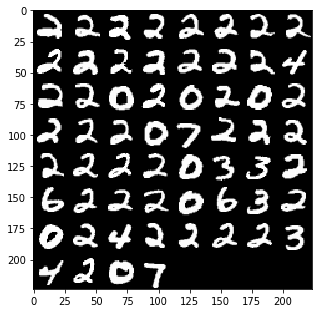

In [21]:
# Plot lowest total predictive uncertainty 
plot_uncertain_topk(total_entropy, 60, test_dataset, high_uncertainty=False)

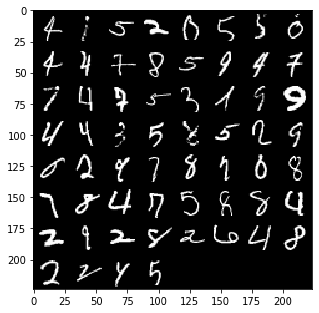

In [22]:
# Plot highest total predictive uncertainty 
plot_uncertain_topk(total_entropy, 60, test_dataset)

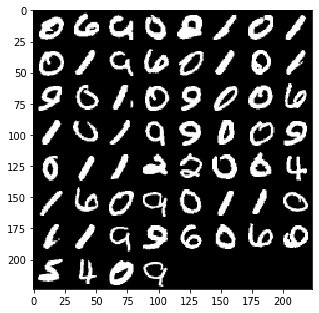

In [23]:
# Plot aleatoric uncertainty
plot_uncertain_topk(total_entropy - model_entropy, 60, test_dataset)

In [24]:
total_probs_np = total_probs.cpu().detach().numpy()
total_entropy_np = total_entropy.cpu().detach().numpy()
total_label_np = total_label.cpu().detach().numpy()

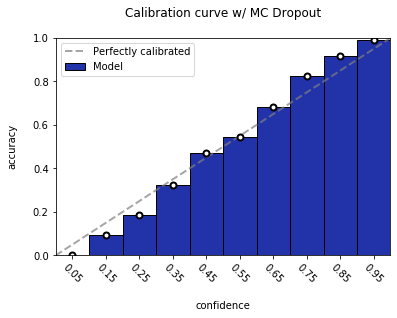

In [25]:
_ = plot_multiclass_calibration_curve(total_probs_np, total_label_np, bins=10, title='Calibration curve w/ MC Dropout')